In [1]:
import chollaread
import yt
import trident
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0', cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-08-10 21:05:09,625 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-10 21:05:09,625 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-08-10 21:05:09,626 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-10 21:05:09,627 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-08-10 21:05:09,627 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
def slicep(direction, ray1=False, ray2=False):
    
    get_cmap("cet_bmw")
    sl = yt.SlicePlot(ds, direction, [("density")])
    sl.set_cmap(("density"), "cet_bmw")
    
    if ray1==True:
        sl.annotate_ray(ray_, arrow=True)
    if ray2==True:
        sl.annotate_ray(ray_2, arrow=True)
    
    sl.show()

In [5]:
def spec_avg(x0, y0, z0, x, y, z, Nx, Nz,
             line, lmin, lmax,
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None,
             DIY=False, ind_p=True):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Nx):
        for j in range(Nz):
        
            ray_start = np.array([x0+(i*cu),y0,z0+(j*cu)])*k
            ray_end = np.array([x+(i*cu),y,z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.001)
            
            if DIY==False:
            
                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')
                
            else:
                sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None, identifier=line)

                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
  
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Nx*Nz): # N = Nx * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    reds = get_cmap('cet_CET_L18')
    colors = reds(np.linspace(0.25,1,Nx*Nz))
        
    fig = plt.figure(figsize=(15, 5))
    
    if ind_p==True:
        for p in range(Nx*Nz):
            plt.plot(arrays[0][0], arrays[p][1], alpha=0.6, color=colors[p])
    else:
        pass
    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line+" '140.h5.0'", fontsize=16)
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength', fontsize=14)
    plt.ylabel('Relative Flux', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    return arrays[0][0], avg
    

In [37]:
def get_N(a0, a):
    return ((a-a0)*256)+1

In [6]:
ray1 = make_ray(0.92,0,0.493,0.92,1,0.493)
ray2 = make_ray(0.947,0,0.493,0.95,1,0.493)

yt : [INFO     ] 2022-08-10 21:05:32,442 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-10 21:05:32,445 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-10 21:05:33,157 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-08-10 21:05:33,239 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-10 21:05:33,240 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-10 21:05:33,240 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-10 21:05:33,241 Parameters: domain_right_edge      

yt : [INFO     ] 2022-08-01 22:58:16,379 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 22:58:16,381 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 22:58:17,029 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-08-01 22:58:17,107 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:58:17,107 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:58:17,108 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:58:17,108 Parameters: domain_right_edge      


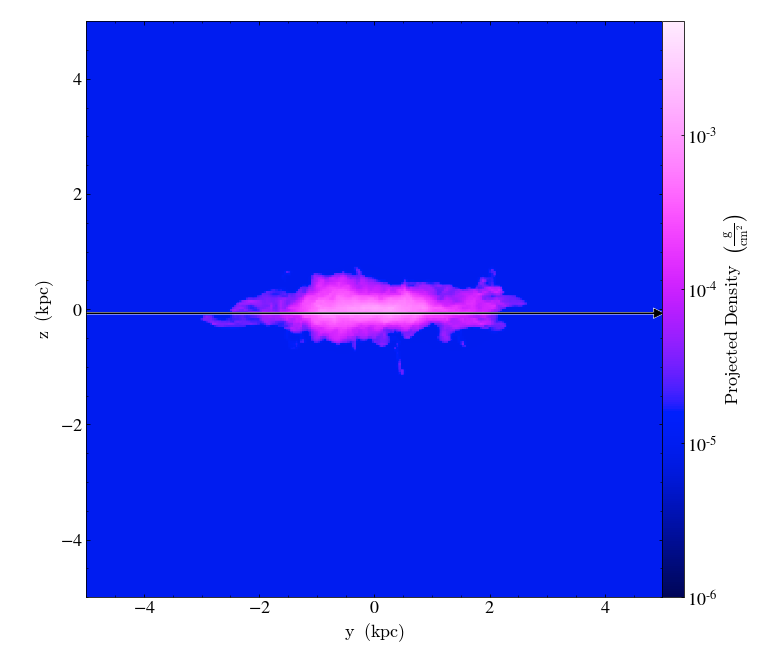

yt : [INFO     ] 2022-08-01 22:58:21,140 Saving plot Overleaf Plots/xproj.jpg_Projection_x_density.png
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot


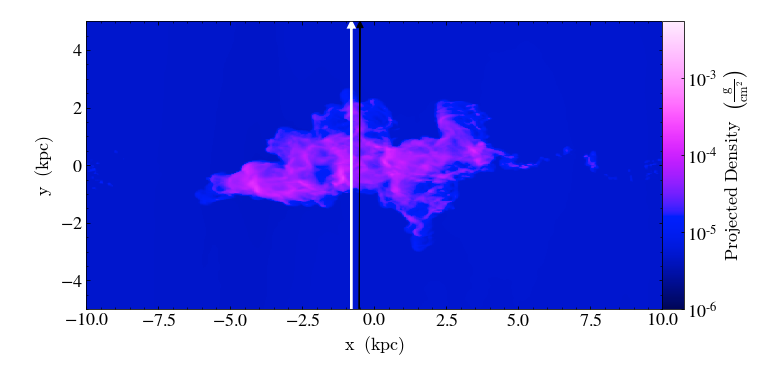

yt : [INFO     ] 2022-08-01 22:58:24,199 Saving plot Overleaf Plots/zproj.jpg_Projection_z_density.png
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot


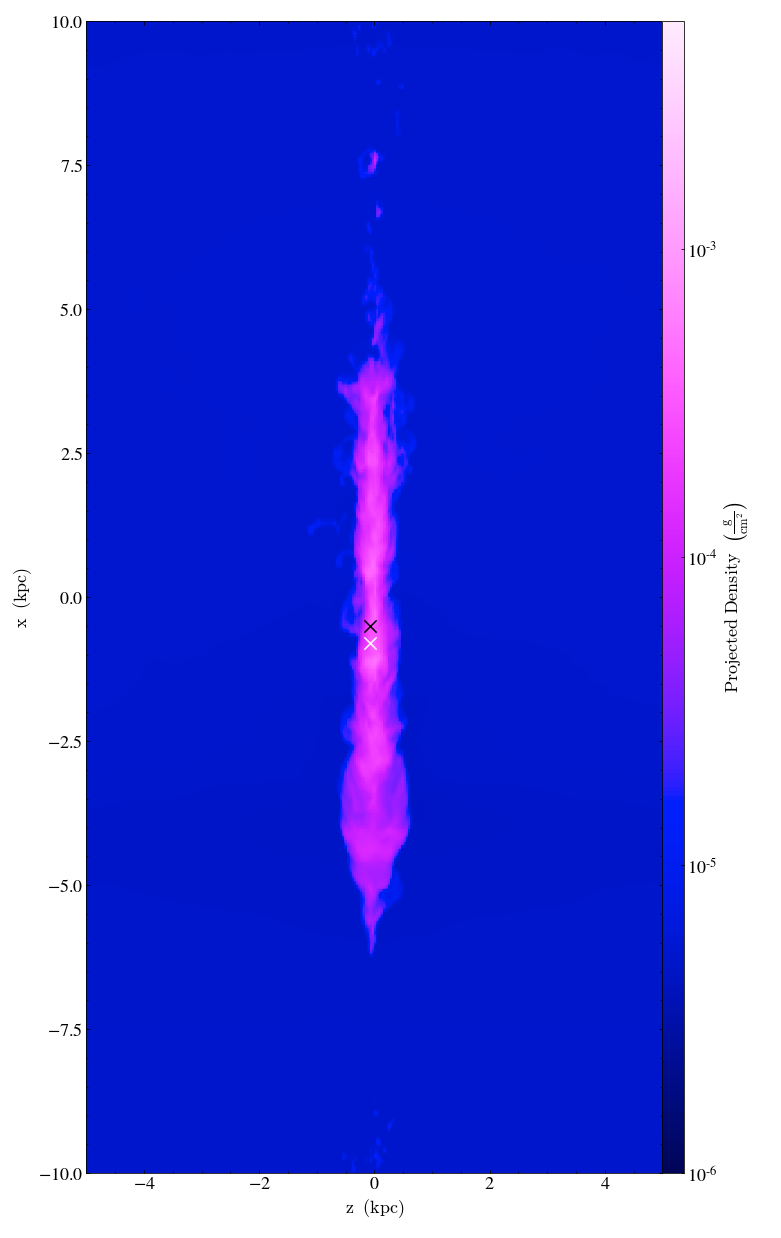

yt : [INFO     ] 2022-08-01 22:58:27,296 Saving plot Overleaf Plots/yproj.jpg_Projection_y_density.png
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot

['Overleaf Plots/yproj.jpg_Projection_y_density.png']

In [74]:
px = yt.ProjectionPlot(ds, 'x', 'density')
px.set_cmap(("density"), "cet_bmw")
px.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
px.annotate_ray(ray1, arrow=True)
px.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
px.show()
px.save('Overleaf Plots/xproj.jpg')

pz = yt.ProjectionPlot(ds, 'z', 'density')
pz.set_cmap(("density"), "cet_bmw")
pz.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
pz.annotate_ray(ray1, arrow=True)
pz.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
pz.show()
pz.save('Overleaf Plots/zproj.jpg')

py = yt.ProjectionPlot(ds, 'y', 'density')
py.set_cmap(("density"), "cet_bmw")
py.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
py.annotate_marker((0.493,0.46), coord_system="axis", plot_args={"color":"white", "s": 150})
py.annotate_marker((0.493, 0.475), coord_system="axis", plot_args={"color":"black", "s": 150})
py.show()
py.save('Overleaf Plots/yproj.jpg')

In [7]:
import pandas as pd

In [8]:
pd.read_csv('IE.csv')

,Elements,Ionization Energy [eV]
0,Al II,5.985386
1,Mg II,7.645748
2,Fe II,7.902783
3,Si II,8.151526
4,C II,11.260818
5,O II,13.617661
6,Fe III,16.188008
7,Si III,16.345546
8,Al III,18.828833
9,C III,24.383065


## Ly a

yt : [INFO     ] 2022-08-01 22:21:31,777 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 22:21:31,780 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 22:21:32,445 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:21:32,519 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:21:32,520 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:21:32,520 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:21:32,520 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 22:21:46,426 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-01 22:21:46,606 Getting segment at z = 0.0: [0.46976563 0.         0.2465    ] unitary to [0.46976563 0.5        0.2465    ] unitary.
yt : [INFO     ] 2022-08-01 22:21:46,607 Getting subsegment: [0.469765625 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.469765625 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 22:21:47,245 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:21:47,323 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:21:47,323 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:21:47,324 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:21:47,324 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 22:21:47,324 Parameters: cosmological_simu

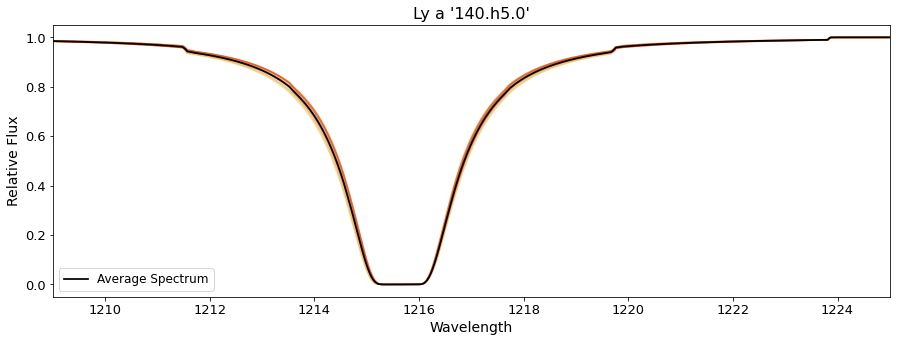

In [36]:
HI = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'Ly a' ,1209,1225)

## O I 1302

yt : [INFO     ] 2022-08-01 20:38:13,113 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:38:13,115 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:38:13,736 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:38:13,810 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:38:13,811 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:38:13,811 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:38:13,811 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 20:38:18,773 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:38:18,773 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:38:18,773 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:38:18,774 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 20:38:18,774 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 20:38:18,775 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 20:38:18,785 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 20:38:18,789 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 20:38:18,873 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 20:38:18,878 Creating spectrum
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4075.01it/

yt : [INFO     ] 2022-08-01 20:38:23,645 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 20:38:23,649 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 20:38:23,729 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 20:38:23,734 Creating spectrum
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3998.07it/s]
yt : [INFO     ] 2022-08-01 20:38:24,515 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-08-01 20:38:24,534 Getting segment at z = 0.0: [0.47367188 0.         0.2465    ] unitary to [0.47367188 0.5        0.2465    ] unitary.
yt : [INFO     ] 2022-08-01 20:38:24,535 Getting subsegment: [0.473671875 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.473671875 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:38:25,186 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:38:25,259 Paramet

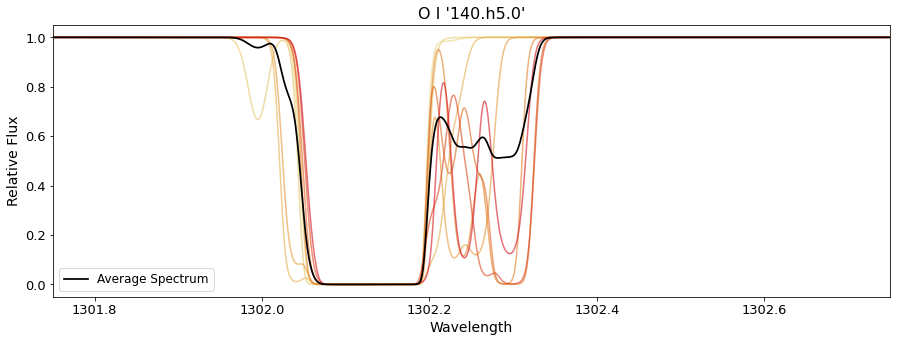

In [16]:
OI1302 = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'O I' ,1301.75,1302.75)

## Al II 1670

yt : [INFO     ] 2022-08-01 20:47:05,369 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:47:05,371 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:47:06,011 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:47:06,090 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:47:06,091 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:47:06,091 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:47:06,091 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 20:47:11,003 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:47:11,081 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:47:11,081 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:47:11,081 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:47:11,082 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 20:47:11,082 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 20:47:11,083 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 20:47:11,094 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 20:47:11,098 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 20:47:11,184 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 20:47:11,187 Creating spectrum
Add

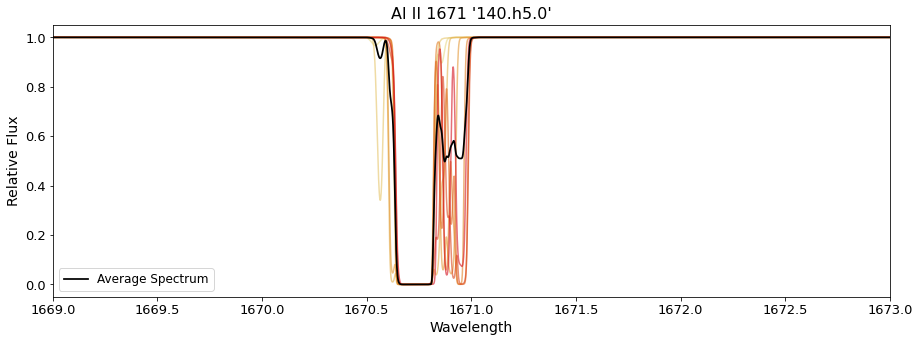

In [21]:
AlII = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'Al II 1671', 1669,1673)

## Mg II 2796

yt : [INFO     ] 2022-08-01 20:47:13,481 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:47:13,483 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:47:14,117 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:47:14,195 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:47:14,196 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:47:14,196 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:47:14,196 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 20:47:19,298 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:47:19,373 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:47:19,373 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:47:19,373 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:47:19,374 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 20:47:19,374 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 20:47:19,375 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 20:47:19,385 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 20:47:19,389 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 20:47:19,472 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 20:47:19,476 Creating spectrum
Add

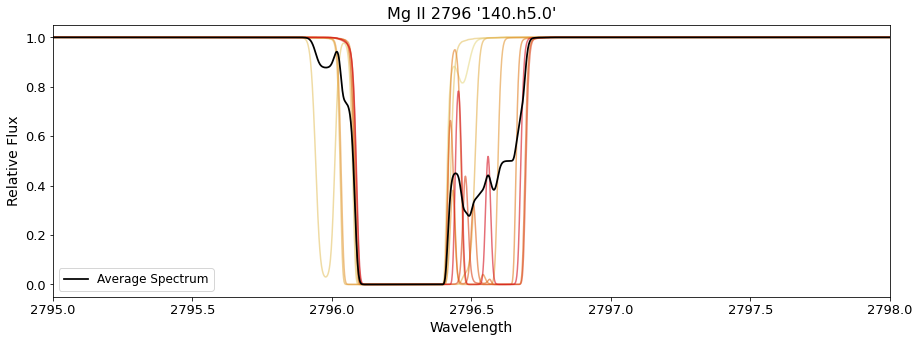

In [22]:
MgII = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'Mg II 2796',2795, 2798,
                el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, 
                DIY=True)

## Fe II 2600

yt : [INFO     ] 2022-08-01 20:47:45,323 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:47:45,325 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:47:46,002 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:47:46,076 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:47:46,077 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:47:46,077 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:47:46,078 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 20:47:50,897 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:47:50,970 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:47:50,971 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:47:50,971 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:47:50,971 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 20:47:50,972 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 20:47:50,973 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 20:47:50,983 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 20:47:50,988 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 20:47:51,072 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 20:47:51,075 Creating spectrum
Add

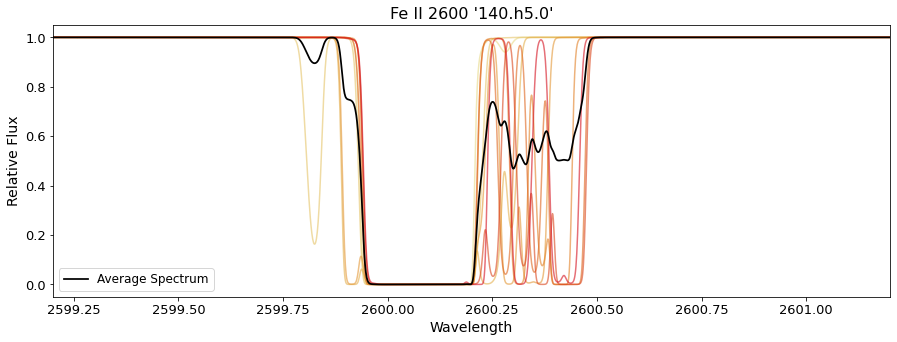

In [24]:
FeII = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'Fe II 2600',2599.2, 2601.2,
                el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, 
                DIY=True)

## Si II 1304

yt : [INFO     ] 2022-08-01 20:47:53,309 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:47:53,310 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:47:53,932 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:47:54,005 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:47:54,006 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:47:54,006 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:47:54,006 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 20:47:59,139 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:47:59,217 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:47:59,218 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:47:59,218 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:47:59,218 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 20:47:59,219 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 20:47:59,220 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 20:47:59,231 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 20:47:59,235 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 20:47:59,324 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 20:47:59,327 Creating spectrum
Add

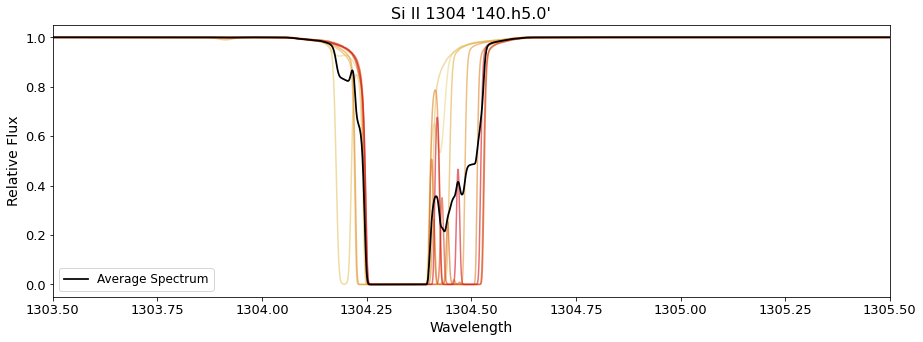

In [25]:
Si1304 = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'Si II 1304' ,1303.5,1305.5)

## C II 1335

yt : [INFO     ] 2022-08-01 20:48:01,705 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:48:01,707 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:48:02,334 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:48:02,408 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:48:02,408 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:48:02,408 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:48:02,409 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 20:48:07,303 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:48:07,303 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:48:07,304 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:48:07,304 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 20:48:07,304 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 20:48:07,305 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 20:48:07,315 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 20:48:07,319 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 20:48:07,455 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 20:48:07,458 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2947

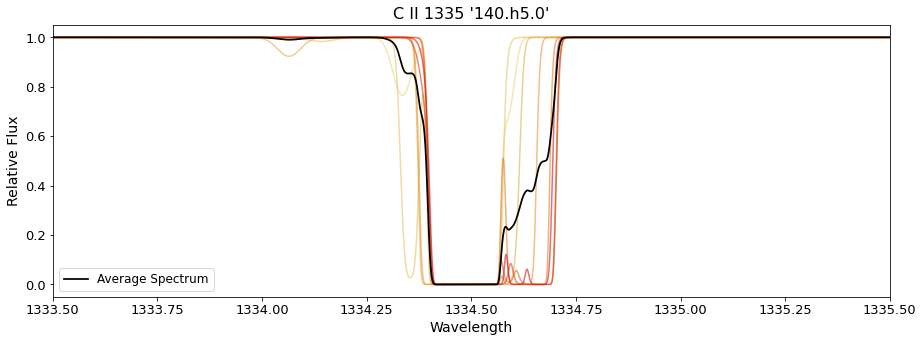

In [26]:
CII1335 = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'C II 1335' ,1333.5,1335.5)

## O II 834

yt : [INFO     ] 2022-08-01 22:49:19,953 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 22:49:19,956 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 22:49:20,607 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:49:20,686 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:49:20,687 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:49:20,687 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:49:20,688 Parameters: domain_right_edge       

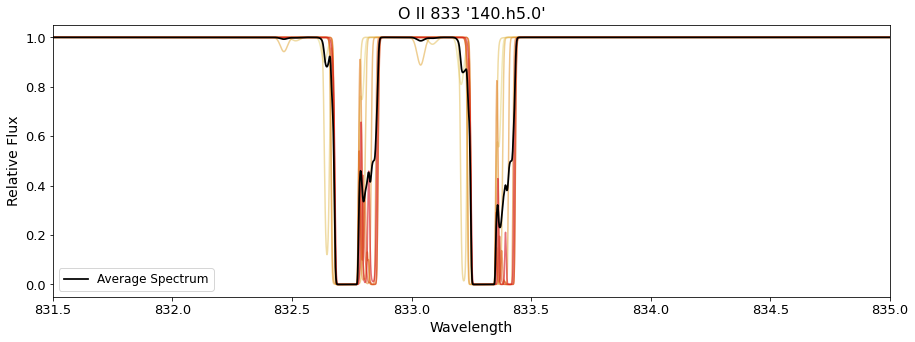

In [72]:
OII = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'O II 833', 831.5,835)

## Fe III 1122

yt : [INFO     ] 2022-08-01 20:48:18,467 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:48:18,468 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:48:19,088 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:48:19,162 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:48:19,162 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:48:19,163 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:48:19,163 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 20:48:23,848 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:48:23,922 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:48:23,923 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:48:23,923 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:48:23,923 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 20:48:23,924 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 20:48:23,925 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 20:48:23,934 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 20:48:23,938 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 20:48:24,021 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 20:48:24,024 Creating spectrum
Add

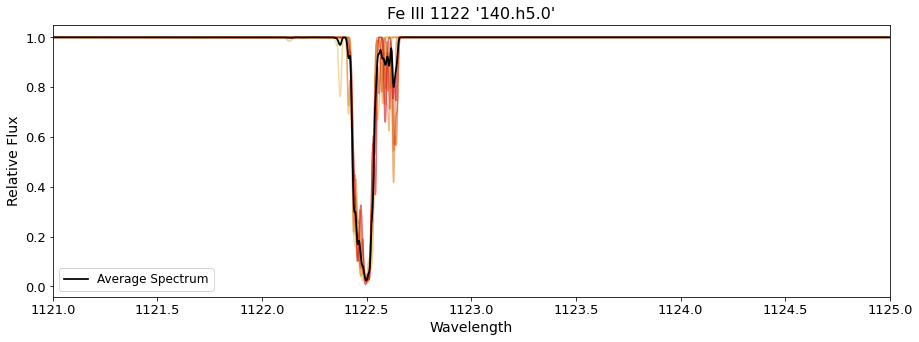

In [28]:
FeIII = spec_avg(0.92,0,0.493,0.92,1,0.493,8,1,'Fe III 1122', 1121,1125,
                el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True)

## Si III 1206

yt : [INFO     ] 2022-08-01 20:48:26,257 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:48:26,258 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:48:26,922 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:48:26,997 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:48:26,998 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:48:26,998 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:48:26,999 Parameters: domain_right_edge       

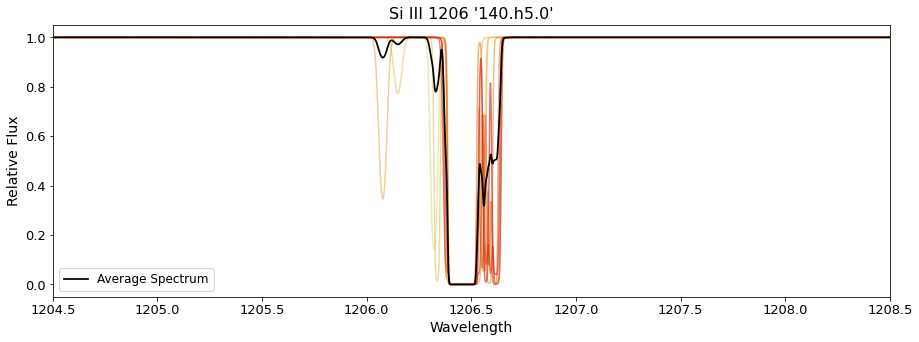

In [29]:
Si3 = spec_avg(0.92,0,0.493,0.92,1,0.493,8,1,'Si III 1206', 1204.5, 1208.5,
               el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True)
plt.savefig('Overleaf Plots/AvgSpec8x1.jpg', dpi=800)

yt : [INFO     ] 2022-08-01 20:48:36,289 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 20:48:36,290 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 20:48:36,904 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 20:48:36,980 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 20:48:36,980 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 20:48:36,981 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 20:48:36,981 Parameters: domain_right_edge       

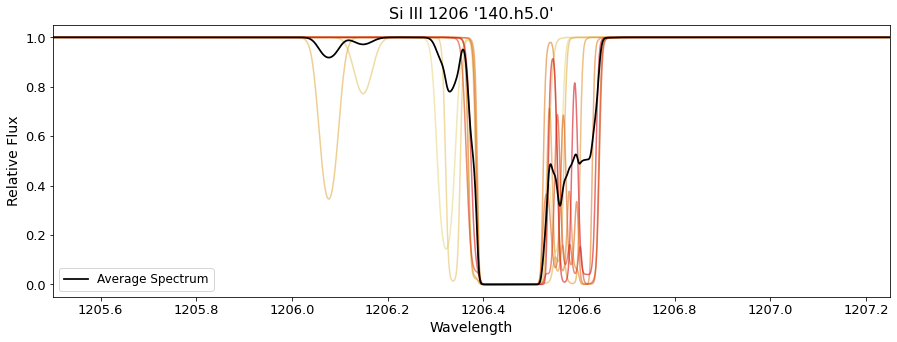

In [30]:
Si3_ = spec_avg(0.92,0,0.493,0.92,1,0.493,8,1,'Si III 1206', 1205.5, 1207.25,
               el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True)
plt.savefig('Overleaf Plots/AvgSpeczoom8x1.jpg', dpi=800)

## Al III 1854

yt : [INFO     ] 2022-08-01 22:34:24,291 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 22:34:24,292 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 22:34:24,953 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:34:25,032 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:34:25,032 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:34:25,032 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:34:25,033 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 22:34:29,925 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:34:30,001 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:34:30,001 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:34:30,002 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:34:30,002 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 22:34:30,002 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 22:34:30,003 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 22:34:30,013 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 22:34:30,018 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 22:34:30,105 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 22:34:30,107 Creating spectrum
Add

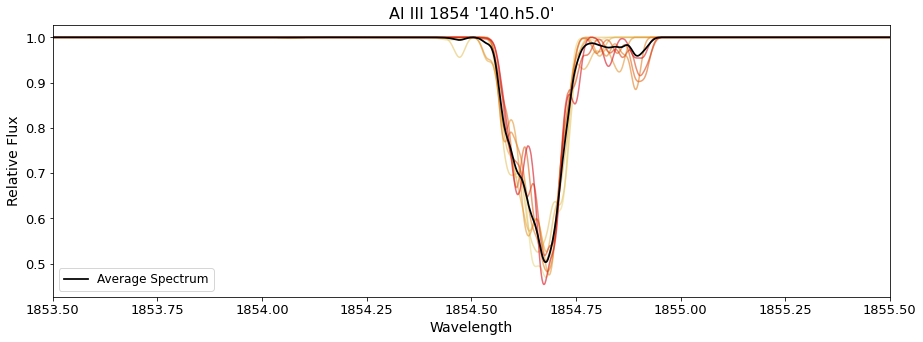

In [59]:
AlIII = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'Al III 1854',1853.5,1855.5,
                el='Al', rom_num='III', lrest=1854.72, gamma=5.57E+08, f_value=5.75E-01, 
                DIY=True)

## C III 977

yt : [INFO     ] 2022-08-01 22:34:33,821 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 22:34:33,823 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 22:34:34,474 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:34:34,551 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:34:34,551 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:34:34,552 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:34:34,552 Parameters: domain_right_edge       

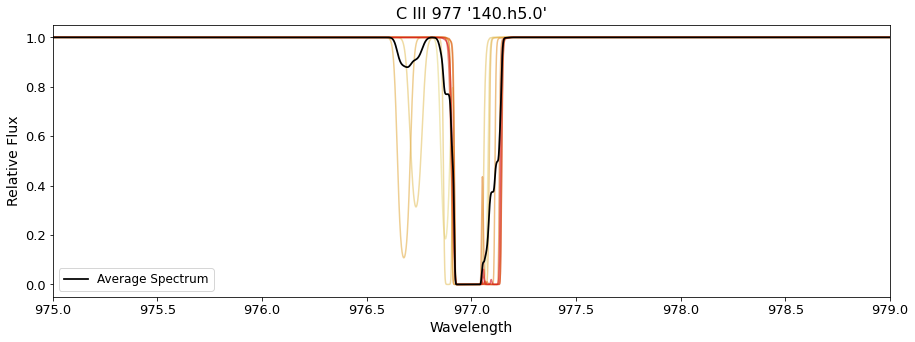

In [60]:
CIII = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1,'C III 977', 975,979,
                el='C', rom_num='III', lrest=977.0201,
                gamma=1.79E+09, f_value=7.67E-01, DIY=True)

## Si IV 1393

yt : [INFO     ] 2022-08-01 22:34:42,892 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 22:34:42,894 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 22:34:43,540 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:34:43,617 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:34:43,617 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:34:43,618 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:34:43,618 Parameters: domain_right_edge       

yt : [INFO     ] 2022-08-01 22:34:48,476 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:34:48,553 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:34:48,554 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:34:48,554 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:34:48,554 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-08-01 22:34:48,555 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-08-01 22:34:48,555 Setting instrument to Custom
yt : [INFO     ] 2022-08-01 22:34:48,566 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-01 22:34:48,571 Identified 1.210e+02 octs
yt : [INFO     ] 2022-08-01 22:34:48,659 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-08-01 22:34:48,663 Creating spectrum
Add

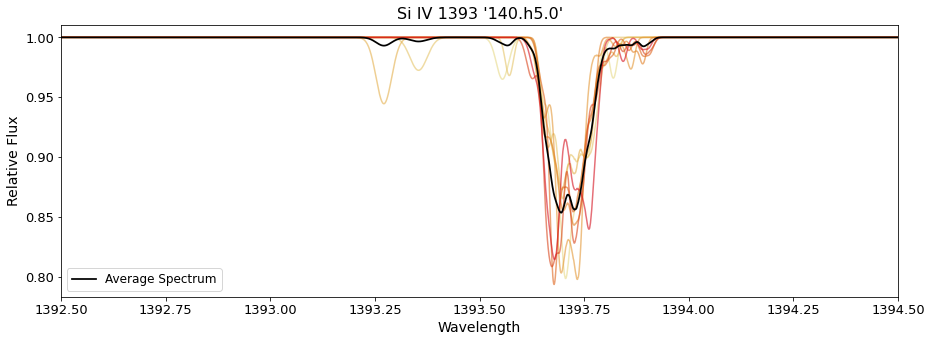

In [61]:
SiIV1393 = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'Si IV 1393',1392.5,1394.5,
                   el='Si', rom_num='IV', lrest=1393.76, gamma=9.0E+8, f_value=5.24E-01, 
                   DIY=True)

## C IV

yt : [INFO     ] 2022-08-01 22:34:50,885 Getting segment at z = 0.0: [0.46   0.     0.2465] unitary to [0.46   0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-01 22:34:50,886 Getting subsegment: [0.4600000000000001 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4600000000000001 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-08-01 22:34:51,515 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-08-01 22:34:51,591 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-01 22:34:51,592 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-01 22:34:51,592 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-01 22:34:51,592 Parameters: domain_right_edge       

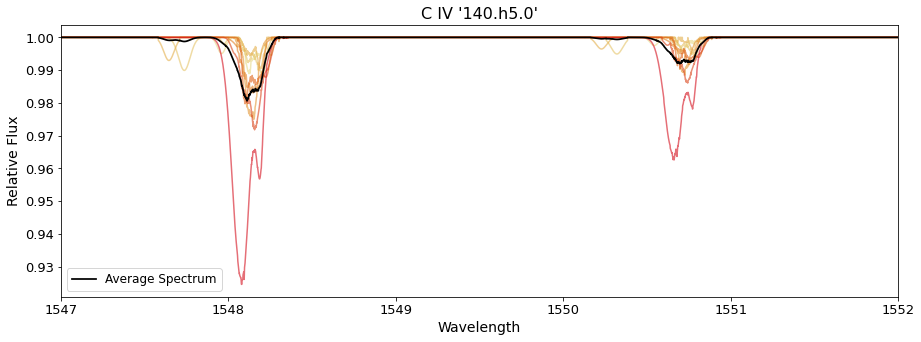

In [62]:
CIV = spec_avg(0.92,0,0.493,0.92,1,0.493, 8,1, 'C IV' ,1547,1552)